## 실습 1: 아이리스 데이터셋을 이용한 머신러닝 튜토리얼

-   supervised learning 튜토리얼에 가장 많이 사용되는 데이터셋
-   아이리스 3종 각 50개의 샘플 (총 150개)
-   측정값: sepal length, sepal width, petal length, petal width
-   측정값을 이용해 어떤 종의 꽃인지 예측해보기

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def treeviz(tree): 
    dot_data = StringIO()  
    export_graphviz(tree, out_file=dot_data,  
                    feature_names=['petal length (cm)', 'sepal length (cm)'],  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,  
                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())  

In [3]:
def plot_model_decision(model, proba=False):
    plt.figure(figsize=(8, 8))
    xx, yy = np.meshgrid(np.linspace(0, 9, 100),
                         np.linspace(0, 9, 100))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=0.3)


    for i, label in enumerate(iris.target_names):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

    plt.xlabel('petal length (cm)')
    plt.ylabel('sepal length (cm)')
    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.legend(loc='best');

## 데이터 로딩

In [4]:
iris = load_iris()

## 데이터 탐색

In [5]:
# features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

![Iris](images/03_iris.png)

In [6]:
# classes or target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

![setosa](./images/iris_setosa.jpg)
<center>**cetosa**</center>
![versicolor](./images/iris_versicolor.jpg)
<center>**versicolor**</center>
![virginica](./images/iris_virginica.jpg)
<center>**virginica**</center>

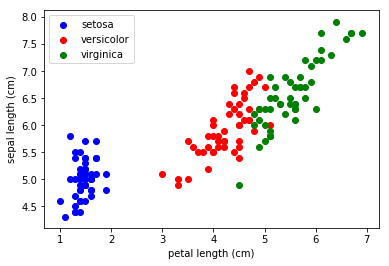

In [7]:
x_index = 2
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

In [8]:
X = iris.data[:, [2, 0]]
y = iris.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=50, random_state=42)

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

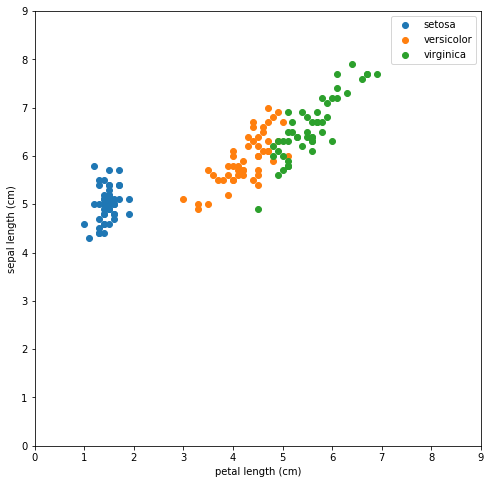

In [11]:
plt.figure(figsize=(8, 8))
for i, label in enumerate(iris.target_names):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=label)

plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.legend(loc='best');

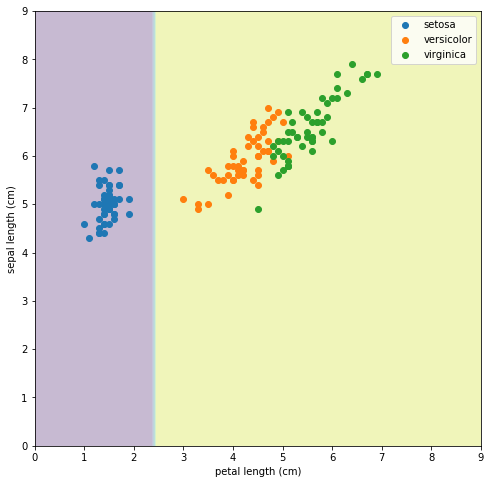

In [12]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)
plot_model_decision(tree)

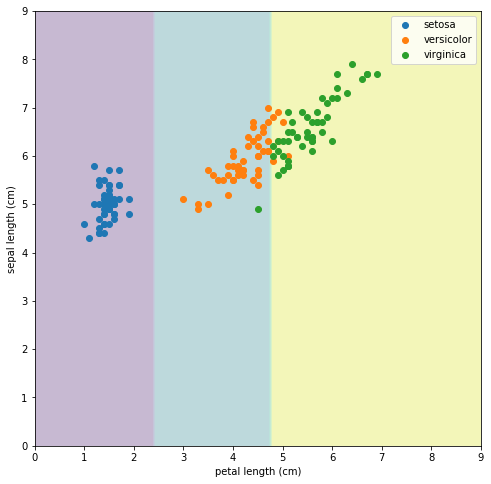

In [13]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
plot_model_decision(tree)

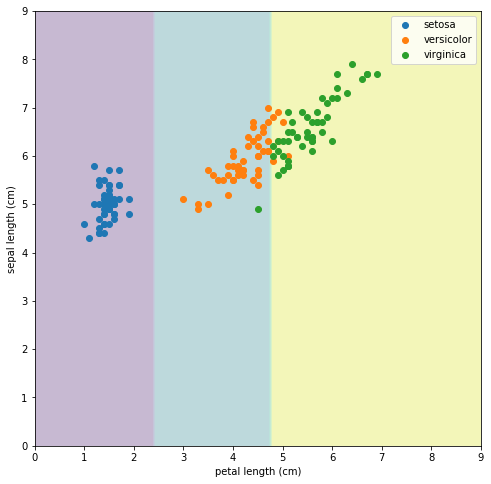

In [14]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
plot_model_decision(tree)

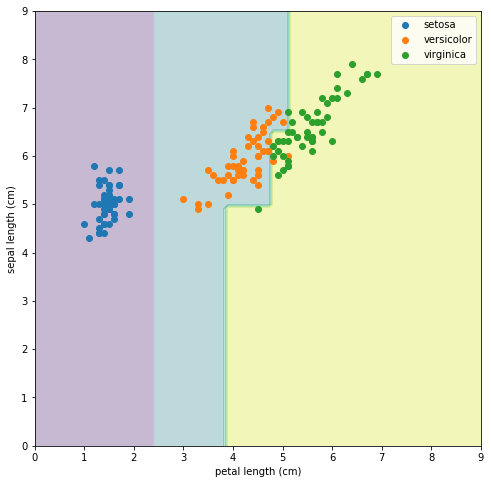

In [15]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
plot_model_decision(tree)

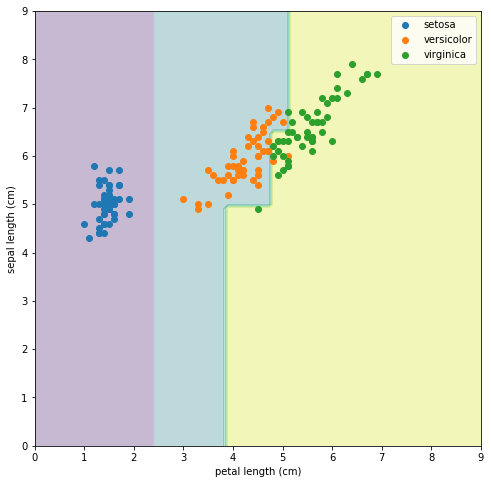

In [16]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
plot_model_decision(tree)

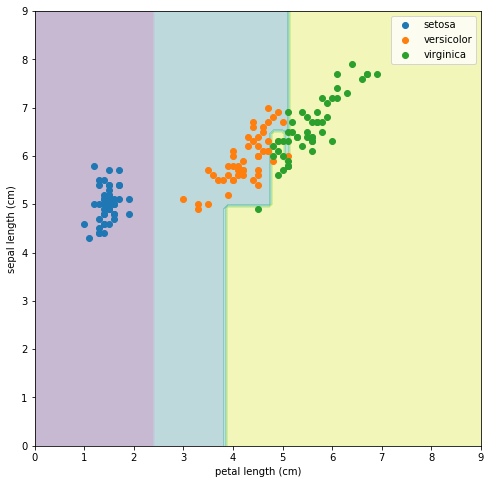

In [17]:
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train)
plot_model_decision(tree)

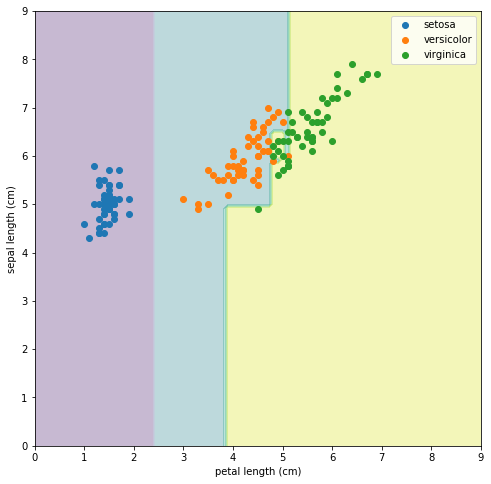

In [18]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train, y_train)
plot_model_decision(tree)

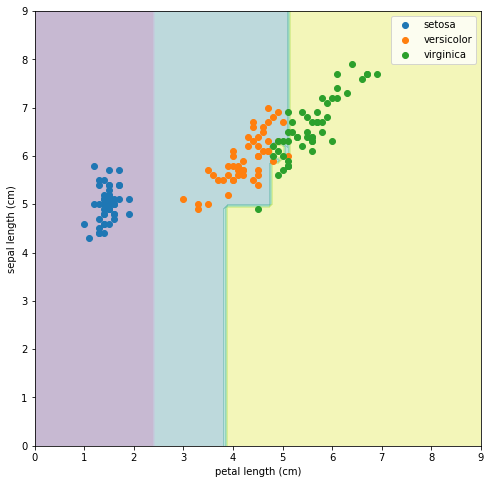

In [19]:
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X_train, y_train)
plot_model_decision(tree)

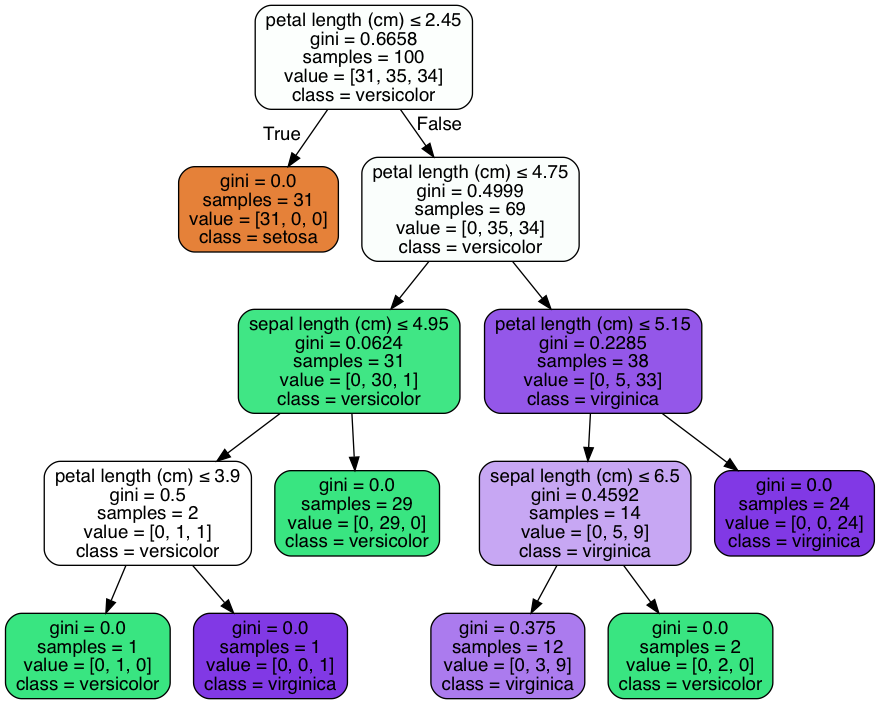

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
treeviz(tree)